# Find a good place to open a Chinese restaurant in Toronto

## Business Probem:

As more and more different cultural people immigrant from all over the world to Canada, people need more and more different cultural things in their life. Restaurant could represent for one aspect in a culture. Toronto, the capital of the province of Ontario, is the most populous Canadian city. In Toronto, there are more and more Chinese immigrants especially young people. They really want to have a taste of Chinese original food instead of revised Chinese food. So there is a big oppotunity for a business of opening a Chinese restaurant. While opening a restaurant can be a very lucrative business, a lack of demand caused many restaurants to close within the first year of opening. There are many different factors that can account for a resturant's success such as price, location, quality of the food.

The goal of this project is to use the Foursquare API to determine a good location in Toronto to open a Chinese restaurant. For Chinese Restaurant specifically, location and competition are both determined by where the restaurant will be opened.

# Data

I will use Foursquare API to determine the average house price in different neighborhoods, population distribution of each area, the number of the Chinese restaurant in each Neighborhood and the number of total restaurant in each neighborhood. The data will be used to cluster different postal codes to determine the optimal location to open the restaurant. 

1.'List of postal codes of Canada:M' fro wikipedia to find 'postal', 'Borough', 'Neighborhood' in Toronto.



2.Geospatial_data' to find latitude and longitude for different postal area

3.Use 'Demographics of Toronto' to get information about the distribution by their ethnicity.

4. To get location and other information about various venues in Toronto I'm using Foursquare's explore API

In [14]:
!conda install -c conda-forge geopy --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-package-handling-1.6.0|   py37h9bfed18_2         1.5 MB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.6 MB

The following NE

In [16]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::anaconda==2018.12=py37_0
  - defaults/osx-64::numba==0.41.0=py37h6440ff4_0
  - defaults/osx-64::blaze==0.11.3=py37_0
done

## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.10  |           py37_0           5 KB
    altair-4.1.0               |             py_1         614 KB  conda-forge
    anaconda-custom            |           py37_1           3 KB
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         146 KB  conda-forge
    certifi-2020.4.5.2         |   py37hc8dfbb8_0         152 KB  conda-forge
   

In [17]:
!conda install -c conda-forge bs4 --yes

Solving environment: done

## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - bs4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.1       |   py37hc8dfbb8_0         163 KB  conda-forge
    bs4-4.9.1                  |                0           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         167 KB

The following NEW packages will be INSTALLED:

  bs4                conda-forge/noarch::bs4-4.9.1-0

The following packages will be UPDATED:

  beautifulsoup4     pkgs/main::beautifulsoup4-4.6.3-py37_0 --> conda-forge::beautifulsoup4-4.9.1-py37hc8dfbb8_0



bs4-4.9.1            | 4 KB      | ##################################### | 100% 
beautifulsoup4-4.9.1 | 163 KB    | ##################################### | 100% 
Preparing transa

In [18]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd
# library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# Scrape wikipedia data

In [20]:
import urllib.request
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = urllib.request.urlopen(url)

In [21]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, features='html')

In [22]:
soup.title
soup.title.string

'List of postal codes of Canada: M - Wikipedia'

In [23]:
all_tables=soup.find_all("table")
right_table=soup.find('table', class_='wikitable sortable')

In [24]:
A=[]
B=[]
C=[]
for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

In [25]:
df=pd.DataFrame(A,columns=['Postal Code'])
df['Borough']=B
df['Neighborhood']=C

In [26]:
df['Postal Code']=df['Postal Code'].str.strip()
df['Borough']=df['Borough'].str.strip()
df['Neighborhood']=df['Neighborhood'].str.strip()
df1=df[df['Borough'] != 'Not assigned']
df1.shape

(103, 3)

In [27]:
Geospatial=pd.read_csv('http://cocl.us/Geospatial_data')

In [34]:
Geospatial.head()
df2=pd.merge(df1,Geospatial,how='left',on=['Postal Code'])
df2.rename(columns={'Postal Code':'PostolCode'},inplace=True)
df2.shape
df2

,PostolCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


# import toronto population data

In [29]:
import os
os.getcwd()


'/Users/grace'

In [30]:
import pandas as pd
toronto_pop=pd.read_csv(r'/Users/grace/Desktop/toronto_pop.csv')
toronto_pop.head()

,PostolCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,9340,3355,2315,2390,1300,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134,12494,2403,5.20,3700,60,25,45,60,70,80,90,120,80,115,230,230,200,195,210,1890,490,410,550,440,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411,54764,8570,19.04,19855,315,540,815,970,880,890,905,885,905,815,1565,1360,1255,1140,1050,5570,1970,1320,1390,915,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137,53485,4345,12.31,18445,435,455,685,1170,825,960,910,950,955,815,1725,1405,1240,1070,865,3980,1660,1030,855,430,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127,29960,4011,7.47,10765,615,220,255,450,370,475,465,520,495,530,935,845,765,615,575,2625,1015,700,635,275,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77


In [13]:
toronto_pop.shape

(88, 38)

In [31]:
toronto_pop.dropna()

,PostolCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,9340,3355,2315,2390,1300,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134,12494,2403,5.20,3700,60,25,45,60,70,80,90,120,80,115,230,230,200,195,210,1890,490,410,550,440,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411,54764,8570,19.04,19855,315,540,815,970,880,890,905,885,905,815,1565,1360,1255,1140,1050,5570,1970,1320,1390,915,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137,53485,4345,12.31,18445,435,455,685,1170,825,960,910,950,955,815,1725,1405,1240,1070,865,3980,1660,1030,855,430,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127,29960,4011,7.47,10765,615,220,255,450,370,475,465,520,495,530,935,845,765,615,575,2625,1015,700,635,275,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77
5,M1J,Scarborough,139,16724,5395,3.10,5920,105,180,305,330,325,345,370,345,325,355,570,420,355,300,220,1080,410,240,230,195,33.01,2.33,19.91,5.68,1.67,0.84,0.42,3.41,0.12,0.12,26.13
6,M1K,Scarborough,125,13641,7031,1.94,5165,120,95,205,250,240,295,295,295,340,295,465,440,400,280,260,900,405,250,185,70,27.34,4.40,12.50,17.59,1.65,1.72,0.99,1.28,0.26,0.07,26.83
7,M1L,Scarborough,302,56512,26604,10.30,20800,480,580,1000,1160,1095,1135,1155,1110,1140,1055,1790,1545,1270,1095,975,4250,1735,1005,1045,465,31.84,5.75,12.58,6.93,1.27,0.74,0.98,2.23,0.55,0.40,31.57
8,M1M,Scarborough,385,55834,14094,13.83,20390,305,420,780,1120,1100,1105,1075,1065,1060,980,1755,1430,1330,1125,910,4825,1760,1150,1155,745,23.88,4.92,12.26,11.01,1.36,0.84,0.88,1.50,0.27,0.43,36.61
9,M1N,Scarborough,122,22291,3765,5.92,9200,165,290,320,335,405,330,315,340,330,310,650,595,525,475,465,3345,935,670,825,930,6.30,5.34,3.99,3.72,1.01,0.47,1.19,0.43,0.13,0.87,71.51


In [36]:
df_data=pd.merge(df2,toronto_pop,how='left',on=['PostolCode'])

In [37]:
df_data.head()

,PostolCode,Borough_x,Neighborhood,Latitude,Longitude,Borough_y,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M3A,North York,Parkwoods,43.753259,-79.329656,North York,45.0,34805.0,4691.0,7.42,13305.0,345.0,185.0,315.0,520.0,590.0,600.0,615.0,575.0,620.0,620.0,1200.0,1025.0,880.0,790.0,650.0,3795.0,1220.0,790.0,890.0,890.0,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98
1,M4A,North York,Victoria Village,43.725882,-79.315572,North York,43.0,17510.0,3710.0,4.72,7410.0,180.0,205.0,280.0,540.0,420.0,385.0,400.0,370.0,370.0,425.0,640.0,570.0,490.0,385.0,290.0,1445.0,565.0,315.0,325.0,240.0,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Downtown Toronto,149.0,76716.0,25823.0,8.01,45710.0,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,15740.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,North York,112.0,6577.0,3614.0,1.82,2650.0,50.0,60.0,160.0,190.0,185.0,170.0,190.0,170.0,155.0,125.0,205.0,200.0,160.0,110.0,105.0,430.0,165.0,95.0,100.0,60.0,5.02,1.67,31.47,6.01,5.09,1.06,3.27,0.15,0.23,0.00,39.68
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_data.shape

(104, 42)

In [111]:
df_data.dropna(inplace=True)
df_data.shape

(88, 41)

In [114]:
df_data.head()

,PostolCode,Borough_x,Neighborhood,Latitude,Longitude,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M3A,North York,Parkwoods,43.753259,-79.329656,45.0,34805.0,4691.0,7.42,13305.0,345.0,185.0,315.0,520.0,590.0,600.0,615.0,575.0,620.0,620.0,1200.0,1025.0,880.0,790.0,650.0,3795.0,1220.0,790.0,890.0,890.0,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98
1,M4A,North York,Victoria Village,43.725882,-79.315572,43.0,17510.0,3710.0,4.72,7410.0,180.0,205.0,280.0,540.0,420.0,385.0,400.0,370.0,370.0,425.0,640.0,570.0,490.0,385.0,290.0,1445.0,565.0,315.0,325.0,240.0,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,149.0,76716.0,25823.0,8.01,45710.0,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,15740.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,112.0,6577.0,3614.0,1.82,2650.0,50.0,60.0,160.0,190.0,185.0,170.0,190.0,170.0,155.0,125.0,205.0,200.0,160.0,110.0,105.0,430.0,165.0,95.0,100.0,60.0,5.02,1.67,31.47,6.01,5.09,1.06,3.27,0.15,0.23,0.00,39.68
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,263.0,90290.0,6208.0,45.74,26825.0,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,9340.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64


In [118]:
spend_power=pd.read_csv(r'/Users/grace/Desktop/spendpower.csv')
spend_power.head()

,PostolCode,Spend Power
0,M1B,3005025000
1,M1C,554537500
2,M1E,1916462500
3,M1G,1501412500
4,M1H,946312500


In [121]:
spend_power['Spend Power'] = (spend_power['Spend Power']-spend_power['Spend Power'].mean())/spend_power['Spend Power'].std()
spend_power.head()

,PostolCode,Spend Power
0,M1B,1.707959
1,M1C,-0.748473
2,M1E,0.616756
3,M1G,0.200699
4,M1H,-0.355747


In [122]:
df_data1=pd.merge(df_data,spend_power,how='left',on=['PostolCode'])

In [123]:
df_data1.head()

,PostolCode,Borough_x,Neighborhood,Latitude,Longitude,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spend Power
0,M3A,North York,Parkwoods,43.753259,-79.329656,45.0,34805.0,4691.0,7.42,13305.0,345.0,185.0,315.0,520.0,590.0,600.0,615.0,575.0,620.0,620.0,1200.0,1025.0,880.0,790.0,650.0,3795.0,1220.0,790.0,890.0,890.0,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98,0.039008
1,M4A,North York,Victoria Village,43.725882,-79.315572,43.0,17510.0,3710.0,4.72,7410.0,180.0,205.0,280.0,540.0,420.0,385.0,400.0,370.0,370.0,425.0,640.0,570.0,490.0,385.0,290.0,1445.0,565.0,315.0,325.0,240.0,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18,-0.724715
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,149.0,76716.0,25823.0,8.01,45710.0,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,15740.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69,3.841548
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,112.0,6577.0,3614.0,1.82,2650.0,50.0,60.0,160.0,190.0,185.0,170.0,190.0,170.0,155.0,125.0,205.0,200.0,160.0,110.0,105.0,430.0,165.0,95.0,100.0,60.0,5.02,1.67,31.47,6.01,5.09,1.06,3.27,0.15,0.23,0.00,39.68,-1.117428
4,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,263.0,90290.0,6208.0,45.74,26825.0,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,9340.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.707959


# now we have the complete database, next find the coordinates of Toronto

In [124]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [127]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, borough, neighborhood in zip(df_data1['Latitude'], df_data1['Longitude'], df_data1['Borough_x'], df_data1['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

map_toronto

# Foursquare API Credentials

In [128]:
CLIENT_ID = '41JQWV5PI44GEDBJGZOFXLKYHJ4SSGSDAQ20211TXAISKERQ' # your Foursquare ID
CLIENT_SECRET = '5XREPRA50HRCFQHMT3WAZZIFSQENXVXFSQHLA13XEOOXO1EA' # your Foursquare Secret
VERSION = '20200610' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 41JQWV5PI44GEDBJGZOFXLKYHJ4SSGSDAQ20211TXAISKERQ
CLIENT_SECRET:5XREPRA50HRCFQHMT3WAZZIFSQENXVXFSQHLA13XEOOXO1EA


# Function to look up top 200 places within 2000 meters of coordinates

In [130]:
neighborhood_latitude = df_data1.loc[0, 'Latitude'] 
neighborhood_longitude = df_data1.loc[0, 'Longitude']

neighborhood_name = df_data1.loc[0, 'Neighborhood'] 


In [131]:
LIMIT = 200 
radius = 2000 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [134]:
toronto_venues = getNearbyVenues(names=df_data1['Neighborhood'],
                                   latitudes=df_data1['Latitude'],
                                   longitudes=df_data1['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, 

In [135]:
print(toronto_venues.shape)
toronto_venues.head()

(7573, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Donalda Golf & Country Club,43.752816,-79.342741,Golf Course
2,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
3,Parkwoods,43.753259,-79.329656,Island Foods,43.745866,-79.346035,Caribbean Restaurant
4,Parkwoods,43.753259,-79.329656,Galleria Supermarket,43.753520,-79.349518,Supermarket


In [136]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,100,100,100,100,100,100
"Alderwood, Long Branch",100,100,100,100,100,100
"Bathurst Manor, Wilson Heights, Downsview North",57,57,57,57,57,57
Bayview Village,51,51,51,51,51,51
"Bedford Park, Lawrence Manor East",100,100,100,100,100,100
"Birch Cliff, Cliffside West",43,43,43,43,43,43
"Brockton, Parkdale Village, Exhibition Place",100,100,100,100,100,100
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",100,100,100,100,100,100
Caledonia-Fairbanks,100,100,100,100,100,100


# One hot encode the unique categories

In [137]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Store,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pide Place,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stables,Steakhouse,Storage Facility,Stree

In [138]:
toronto_onehot.shape

(7573, 318)

In [140]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').sum().reset_index()
toronto_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Store,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pide Place,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stables,Steakhouse,Storage Facility,Stree

In [141]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                venue  freq
0  Chinese Restaurant  12.0
1         Coffee Shop   8.0
2          Restaurant   5.0
3            Pharmacy   4.0
4      Sandwich Place   3.0


----Alderwood, Long Branch----
                  venue  freq
0           Coffee Shop   9.0
1  Fast Food Restaurant   5.0
2      Department Store   4.0
3           Pizza Place   4.0
4                  Café   3.0


----Bathurst Manor, Wilson Heights, Downsview North----
               venue  freq
0        Coffee Shop   4.0
1        Pizza Place   4.0
2               Park   3.0
3               Bank   3.0
4  Convenience Store   2.0


----Bayview Village----
                venue  freq
0  Chinese Restaurant   5.0
1         Coffee Shop   4.0
2                Park   4.0
3                Bank   3.0
4        Intersection   2.0


----Bedford Park, Lawrence Manor East----
                venue  freq
0         Coffee Shop  12.0
1  Italian Restaurant   6.0
2    Sushi Restaurant   6.0
3              Bakery   5.0
4  

                venue  freq
0         Coffee Shop   7.0
1    Sushi Restaurant   4.0
2  Italian Restaurant   4.0
3                 Pub   3.0
4              Bakery   3.0


----Leaside----
               venue  freq
0        Coffee Shop   6.0
1  Indian Restaurant   5.0
2      Grocery Store   5.0
3             Bakery   4.0
4         Restaurant   3.0


----Little Portugal, Trinity----
          venue  freq
0          Café   9.0
1        Bakery   7.0
2   Coffee Shop   5.0
3  Cocktail Bar   4.0
4   Pizza Place   4.0


----Malvern, Rouge----
                  venue  freq
0           Zoo Exhibit  17.0
1            Restaurant   3.0
2  Fast Food Restaurant   3.0
3    Athletics & Sports   2.0
4           Pizza Place   2.0


----Milliken, Agincourt North, Steeles East, L'Amoreaux East----
                venue  freq
0  Chinese Restaurant  17.0
1         Coffee Shop   6.0
2                Park   5.0
3   Korean Restaurant   4.0
4        Dessert Shop   4.0


----Mimico NW, The Queensway West, South of

                       venue  freq
0                Coffee Shop   8.0
1  Middle Eastern Restaurant   4.0
2                Pizza Place   4.0
3          Korean Restaurant   3.0
4             Discount Store   2.0


----Woburn----
                  venue  freq
0           Coffee Shop  10.0
1  Fast Food Restaurant   7.0
2        Sandwich Place   4.0
3           Supermarket   3.0
4        Discount Store   3.0


----Woodbine Heights----
         venue  freq
0         Park   7.0
1  Coffee Shop   6.0
2         Café   5.0
3  Pizza Place   5.0
4    Gastropub   4.0


----York Mills, Silver Hills----
                    venue  freq
0             Coffee Shop  13.0
1                    Bank   7.0
2             Pizza Place   4.0
3  Furniture / Home Store   3.0
4                    Café   3.0




In [142]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [143]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Coffee Shop,Restaurant,Pharmacy,Sandwich Place,Shopping Mall,Bank,Indian Restaurant,Breakfast Spot,Supermarket
1,"Alderwood, Long Branch",Coffee Shop,Fast Food Restaurant,Department Store,Pizza Place,Burger Joint,Seafood Restaurant,Café,Sandwich Place,Restaurant,Electronics Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Pizza Place,Coffee Shop,Park,Bank,Gas Station,Restaurant,Bagel Shop,Sandwich Place,Convenience Store,Middle Eastern Restaurant
3,Bayview Village,Chinese Restaurant,Coffee Shop,Park,Bank,Café,Gas Station,Intersection,Grocery Store,Japanese Restaurant,Clothing Store
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sushi Restaurant,Italian Restaurant,Bakery,Sandwich Place,Bagel Shop,Café,Restaurant,Pub,Pizza Place


In [148]:
toronto_grouped.columns.values.tolist()

['Neighborhood',
 'Zoo Exhibit',
 'Accessories Store',
 'Afghan Restaurant',
 'African Restaurant',
 'Airport',
 'Airport Lounge',
 'American Restaurant',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Argentinian Restaurant',
 'Art Gallery',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Dealership',
 'Auto Garage',
 'Automotive Shop',
 'BBQ Joint',
 'Baby Store',
 'Badminton Court',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Baseball Stadium',
 'Basketball Court',
 'Basketball Stadium',
 'Bath House',
 'Beach',
 'Beach Bar',
 'Beer Bar',
 'Beer Store',
 'Big Box Store',
 'Bike Shop',
 'Bistro',
 'Bookstore',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridal Shop',
 'Bridge',
 'Bubble Tea Shop',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Butcher',
 'Cafeteria',
 'Café',
 'Candy Store',
 'Cantonese Restaurant',
 'Caribbean 

In [160]:
venues_grouped=toronto_grouped
venues_sorted=neighborhoods_venues_sorted

# Calculate the total number of restaurants in each region

In [154]:
total_restaurants = venues_grouped['African Restaurant']+venues_grouped['American Restaurant']+\
venues_grouped['Argentinian Restaurant']+venues_grouped['Asian Restaurant']+venues_grouped['BBQ Joint']+\
venues_grouped['Bagel Shop']+venues_grouped['Brazilian Restaurant']+\
venues_grouped['Breakfast Spot']+venues_grouped['Burger Joint']+venues_grouped['Burrito Place']+\
venues_grouped['Cantonese Restaurant']+venues_grouped['Caribbean Restaurant']+\
venues_grouped['Caucasian Restaurant']+venues_grouped['Chinese Restaurant']+venues_grouped['Comfort Food Restaurant']+\
venues_grouped['Cuban Restaurant']+venues_grouped['Deli / Bodega']+venues_grouped['Dim Sum Restaurant']+\
venues_grouped['Diner']+venues_grouped['Doner Restaurant']+venues_grouped['Dumpling Restaurant']+\
venues_grouped['Eastern European Restaurant']+venues_grouped['Egyptian Restaurant']+venues_grouped['Ethiopian Restaurant']+\
venues_grouped['Falafel Restaurant']+venues_grouped['Fast Food Restaurant']+venues_grouped['Filipino Restaurant']+\
venues_grouped['Fish & Chips Shop']+venues_grouped['French Restaurant']+venues_grouped['Fried Chicken Joint']+\
venues_grouped['German Restaurant']+venues_grouped['Greek Restaurant']+venues_grouped['Hakka Restaurant']+\
venues_grouped['Hawaiian Restaurant']+venues_grouped['Hong Kong Restaurant']+\
venues_grouped['Hotpot Restaurant']+venues_grouped['Hungarian Restaurant']+venues_grouped['Indian Chinese Restaurant']+\
venues_grouped['Indian Restaurant']+venues_grouped['Indonesian Restaurant']+venues_grouped['Italian Restaurant']+\
venues_grouped['Japanese Restaurant']+venues_grouped['Jewish Restaurant']+venues_grouped['Korean Restaurant']+\
venues_grouped['Latin American Restaurant']+venues_grouped['Mediterranean Restaurant']+venues_grouped['Malay Restaurant']+\
venues_grouped['Mexican Restaurant']+venues_grouped['Middle Eastern Restaurant']+venues_grouped['Modern European Restaurant']+\
venues_grouped['Moroccan Restaurant']+venues_grouped['New American Restaurant']+venues_grouped['Pakistani Restaurant']+\
venues_grouped['Persian Restaurant']+venues_grouped['Peruvian Restaurant']+venues_grouped['Pizza Place']+\
venues_grouped['Portuguese Restaurant']+venues_grouped['Ramen Restaurant']+venues_grouped['Restaurant']+\
venues_grouped['Salad Place']+venues_grouped['Sandwich Place']+\
venues_grouped['Seafood Restaurant']+\
venues_grouped['South American Restaurant']+venues_grouped['Spanish Restaurant']+venues_grouped['Sri Lankan Restaurant']+\
venues_grouped['Steakhouse']+venues_grouped['Sushi Restaurant']+venues_grouped['Szechuan Restaurant']+\
venues_grouped['Taco Place']+venues_grouped['Tapas Restaurant']+venues_grouped['Thai Restaurant']+\
venues_grouped['Tibetan Restaurant']+venues_grouped['Turkish Restaurant']+venues_grouped['Vegetarian / Vegan Restaurant']+\
venues_grouped['Vietnamese Restaurant']+venues_grouped['Wings Joint']

In [155]:
df_restaurants = pd.DataFrame(data={'Neighborhood': venues_grouped['Neighborhood'],'Total Restaurants':total_restaurants,
                                  'Chinese Restaurants':venues_grouped['Chinese Restaurant']})


In [156]:
df_restaurants.head(5)

,Neighborhood,Total Restaurants,Chinese Restaurants
0,Agincourt,51,12
1,"Alderwood, Long Branch",40,0
2,"Bathurst Manor, Wilson Heights, Downsview North",24,0
3,Bayview Village,16,5
4,"Bedford Park, Lawrence Manor East",48,1


In [158]:
df_data1.head(5)

,PostolCode,Borough_x,Neighborhood,Latitude,Longitude,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spend Power
0,M3A,North York,Parkwoods,43.753259,-79.329656,45.0,34805.0,4691.0,7.42,13305.0,345.0,185.0,315.0,520.0,590.0,600.0,615.0,575.0,620.0,620.0,1200.0,1025.0,880.0,790.0,650.0,3795.0,1220.0,790.0,890.0,890.0,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98,0.039008
1,M4A,North York,Victoria Village,43.725882,-79.315572,43.0,17510.0,3710.0,4.72,7410.0,180.0,205.0,280.0,540.0,420.0,385.0,400.0,370.0,370.0,425.0,640.0,570.0,490.0,385.0,290.0,1445.0,565.0,315.0,325.0,240.0,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18,-0.724715
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,149.0,76716.0,25823.0,8.01,45710.0,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,15740.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69,3.841548
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,112.0,6577.0,3614.0,1.82,2650.0,50.0,60.0,160.0,190.0,185.0,170.0,190.0,170.0,155.0,125.0,205.0,200.0,160.0,110.0,105.0,430.0,165.0,95.0,100.0,60.0,5.02,1.67,31.47,6.01,5.09,1.06,3.27,0.15,0.23,0.00,39.68,-1.117428
4,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,263.0,90290.0,6208.0,45.74,26825.0,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,9340.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.707959


In [161]:
venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Coffee Shop,Restaurant,Pharmacy,Sandwich Place,Shopping Mall,Bank,Indian Restaurant,Breakfast Spot,Supermarket
1,"Alderwood, Long Branch",Coffee Shop,Fast Food Restaurant,Department Store,Pizza Place,Burger Joint,Seafood Restaurant,Café,Sandwich Place,Restaurant,Electronics Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Pizza Place,Coffee Shop,Park,Bank,Gas Station,Restaurant,Bagel Shop,Sandwich Place,Convenience Store,Middle Eastern Restaurant
3,Bayview Village,Chinese Restaurant,Coffee Shop,Park,Bank,Café,Gas Station,Intersection,Grocery Store,Japanese Restaurant,Clothing Store
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sushi Restaurant,Italian Restaurant,Bakery,Sandwich Place,Bagel Shop,Café,Restaurant,Pub,Pizza Place


# Combine the two dataFrames to get the final data


In [213]:
df_final = pd.merge(df_data1, df_restaurants, how='left',on=['Neighborhood'])
df_final.head(5)
df_final3=df_final

In [215]:
df_final3.dtypes

PostolCode                                        object
Borough_x                                         object
Neighborhood                                      object
Latitude                                         float64
Longitude                                        float64
Neighbourhood Number                             float64
Population, 2016                                 float64
Population density per square kilometre          float64
Land area in square kilometres                   float64
Total - Household total income groups in 2015    float64
Under $5,000                                     float64
$5,000 to $9,999                                 float64
$10,000 to $14,999                               float64
$15,000 to $19,999                               float64
$20,000 to $24,999                               float64
$25,000 to $29,999                               float64
$30,000 to $34,999                               float64
$35,000 to $39,999             

In [167]:
df_final1 = df_final[['Neighborhood','Population, 2016','Land area in square kilometres','Spend Power','Total Restaurants','Chinese Restaurants']]

In [168]:
df_final1.head(5)

,Neighborhood,"Population, 2016",Land area in square kilometres,Spend Power,Total Restaurants,Chinese Restaurants
0,Parkwoods,34805.0,7.42,0.039008,41,3
1,Victoria Village,17510.0,4.72,-0.724715,30,1
2,"Regent Park, Harbourfront",76716.0,8.01,3.841548,27,0
3,"Lawrence Manor, Lawrence Heights",6577.0,1.82,-1.117428,33,1
4,"Malvern, Rouge",90290.0,45.74,1.707959,12,0


# Cluster Neighborhoods

In [172]:
kclusters = 5

toronto_grouped_clustering = df_final1.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 0, 1, 3, 1, 4, 4, 0, 1, 3], dtype=int32)

In [179]:


venues_merged1 = df_final.iloc[:,0:5]


venues_merged1.head() # check the last columns!

,PostolCode,Borough_x,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353


In [180]:
venues_merged1 =venues_merged1.join(df_final1.set_index('Neighborhood'), on='Neighborhood')

venues_merged1.head() # check the last columns!

,PostolCode,Borough_x,Neighborhood,Latitude,Longitude,Cluster Labels,"Population, 2016",Land area in square kilometres,Spend Power,Total Restaurants,Chinese Restaurants
0,M3A,North York,Parkwoods,43.753259,-79.329656,4,34805.0,7.42,0.039008,41,3
1,M4A,North York,Victoria Village,43.725882,-79.315572,0,17510.0,4.72,-0.724715,30,1
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,76716.0,8.01,3.841548,27,0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3,6577.0,1.82,-1.117428,33,1
4,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1,90290.0,45.74,1.707959,12,0


In [202]:
venues_merged2 = df_final.iloc[:,:]


venues_merged2.head() # check the last columns!

,PostolCode,Borough_x,Neighborhood,Latitude,Longitude,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spend Power,Total Restaurants,Chinese Restaurants
0,M3A,North York,Parkwoods,43.753259,-79.329656,45.0,34805.0,4691.0,7.42,13305.0,345.0,185.0,315.0,520.0,590.0,600.0,615.0,575.0,620.0,620.0,1200.0,1025.0,880.0,790.0,650.0,3795.0,1220.0,790.0,890.0,890.0,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98,0.039008,41,3
1,M4A,North York,Victoria Village,43.725882,-79.315572,43.0,17510.0,3710.0,4.72,7410.0,180.0,205.0,280.0,540.0,420.0,385.0,400.0,370.0,370.0,425.0,640.0,570.0,490.0,385.0,290.0,1445.0,565.0,315.0,325.0,240.0,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18,-0.724715,30,1
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,149.0,76716.0,25823.0,8.01,45710.0,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,15740.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69,3.841548,27,0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,112.0,6577.0,3614.0,1.82,2650.0,50.0,60.0,160.0,190.0,185.0,170.0,190.0,170.0,155.0,125.0,205.0,200.0,160.0,110.0,105.0,430.0,165.0,95.0,100.0,60.0,5.02,1.67,31.47,6.01,5.09,1.06,3.27,0.15,0.23,0.00,39.68,-1.117428,33,1
4,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,263.0,90290.0,6208.0,45.74,26825.0,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,9340.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.707959,12,0


In [191]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,cres,sp in zip(venues_merged1['Latitude'], venues_merged1['Longitude'], venues_merged1['Neighborhood'], venues_merged1['Cluster Labels'],venues_merged1['Total Restaurants'],venues_merged1['Chinese Restaurants'],venues_merged1['Spend Power']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Cluste 1

In [186]:
venues_merged1.loc[venues_merged1['Cluster Labels'] == 0, venues_merged1.columns[[1] + list(range(5, venues_merged1.shape[1]))]]


,Borough_x,Cluster Labels,"Population, 2016",Land area in square kilometres,Spend Power,Total Restaurants,Chinese Restaurants
1,North York,0,17510.0,4.72,-0.724715,30,1
5,North York,0,21933.0,2.43,-0.774949,85,2
7,Downtown Toronto,0,21210.0,2.23,-0.483018,32,0
10,North York,0,21933.0,2.43,-0.774949,85,2
16,East Toronto,0,21567.0,3.56,0.172606,35,0
19,East York,0,16828.0,4.68,-0.131455,29,0
22,North York,0,16934.0,5.38,-0.600477,28,5
24,East York,0,21108.0,3.11,-0.849417,36,0
27,Scarborough,0,16724.0,3.10,-0.853941,25,0
31,Downtown Toronto,0,20506.0,1.39,-0.264602,25,1


# Cluste 2

In [224]:
venues_merged1.loc[venues_merged1['Cluster Labels'] == 1, venues_merged1.columns[[1] + list(range(2, venues_merged1.shape[1]))]]

,Borough_x,Neighborhood,Latitude,Longitude,Cluster Labels,"Population, 2016",Land area in square kilometres,Spend Power,Total Restaurants,Chinese Restaurants
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,76716.0,8.01,3.841548,27,0
4,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1,90290.0,45.74,1.707959,12,0
8,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",43.650943,-79.554724,1,105450.0,26.38,3.769799,20,1
45,North York,"Willowdale, Newtonbrook",43.789053,-79.408493,1,90362.0,13.80,2.289742,47,1
59,West Toronto,"High Park, The Junction South",43.661608,-79.464763,1,82712.0,10.51,2.868593,28,0
74,Scarborough,"Milliken, Agincourt North, Steeles East, L'Amo...",43.815252,-79.284577,1,86468.0,19.96,1.658490,50,17


# Cluste 3

In [188]:
venues_merged1.loc[venues_merged1['Cluster Labels'] == 2, venues_merged1.columns[[1] + list(range(5, venues_merged1.shape[1]))]]

,Borough_x,Cluster Labels,"Population, 2016",Land area in square kilometres,Spend Power,Total Restaurants,Chinese Restaurants
15,Scarborough,2,54764.0,19.04,0.616756,15,1
18,Scarborough,2,53485.0,12.31,0.200699,23,2
23,North York,2,67397.0,23.84,1.231870,24,0
28,North York,2,42774.0,6.80,0.178282,33,2
36,East Toronto,2,61173.0,13.31,1.990668,39,0
39,Scarborough,2,56512.0,10.30,0.344773,37,1
44,Scarborough,2,55834.0,13.83,0.478960,11,1
56,Scarborough,2,51575.0,15.42,0.144325,44,3
57,Central Toronto,2,46433.0,4.45,1.471988,42,1
79,Downtown Toronto,2,48217.0,6.28,1.819880,18,1


# Cluster 4

In [189]:
venues_merged1.loc[venues_merged1['Cluster Labels'] == 3, venues_merged1.columns[[1] + list(range(5, venues_merged1.shape[1]))]]

,Borough_x,Cluster Labels,"Population, 2016",Land area in square kilometres,Spend Power,Total Restaurants,Chinese Restaurants
3,North York,3,6577.0,1.82,-1.117428,33,1
9,Scarborough,3,12494.0,5.20,-0.748473,15,0
11,East York,3,7865.0,1.17,-0.908786,32,1
12,Downtown Toronto,3,15818.0,3.00,-0.715932,20,0
13,York,3,14365.0,1.87,-0.574903,47,1
17,York,3,9955.0,1.54,-0.952103,47,1
25,Downtown Toronto,3,7727.0,0.95,-0.946139,24,0
30,East York,3,11499.0,1.70,-0.815736,37,0
33,Scarborough,3,13641.0,1.94,-0.917870,20,4
35,North York,3,11058.0,1.71,-0.945587,50,1


# Cluster 5

In [190]:
venues_merged1.loc[venues_merged1['Cluster Labels'] == 4, venues_merged1.columns[[1] + list(range(5, venues_merged1.shape[1]))]]

,Borough_x,Cluster Labels,"Population, 2016",Land area in square kilometres,Spend Power,Total Restaurants,Chinese Restaurants
0,North York,4,34805.0,7.42,0.039008,41,3
5,North York,4,27695.0,9.98,0.222615,85,2
6,East York,4,31216.0,6.54,0.120831,17,0
10,North York,4,27695.0,9.98,0.222615,85,2
14,Etobicoke,4,29142.0,11.48,0.200373,5,1
20,Downtown Toronto,4,25797.0,1.83,-0.025837,27,0
21,Scarborough,4,29960.0,7.47,-0.355747,35,1
26,West Toronto,4,26134.0,3.06,-0.156014,26,0
29,North York,4,27593.0,13.23,-0.513304,33,2
32,West Toronto,4,32115.0,2.94,0.236473,36,0


# Examine Cluster 2 Further

In [219]:
df_final2.head(3)

,Cluster Labels,PostolCode,Borough_x,Neighborhood,Latitude,Longitude,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spend Power,Total Restaurants,Chinese Restaurants
0,4,M3A,North York,Parkwoods,43.753259,-79.329656,45.0,34805.0,4691.0,7.42,13305.0,345.0,185.0,315.0,520.0,590.0,600.0,615.0,575.0,620.0,620.0,1200.0,1025.0,880.0,790.0,650.0,3795.0,1220.0,790.0,890.0,890.0,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98,0.039008,41,3
1,0,M4A,North York,Victoria Village,43.725882,-79.315572,43.0,17510.0,3710.0,4.72,7410.0,180.0,205.0,280.0,540.0,420.0,385.0,400.0,370.0,370.0,425.0,640.0,570.0,490.0,385.0,290.0,1445.0,565.0,315.0,325.0,240.0,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18,-0.724715,30,1
2,1,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,149.0,76716.0,25823.0,8.01,45710.0,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,15740.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69,3.841548,27,0


In [238]:
cluster=df_final2.loc[df_final2['Cluster Labels'] == 1, df_final2.columns[[1] + list(range(2, df_final2.shape[1]))]]
cluster.head()

,PostolCode,Borough_x,Neighborhood,Latitude,Longitude,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spend Power,Total Restaurants,Chinese Restaurants
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,149.0,76716.0,25823.0,8.01,45710.0,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,15740.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69,3.841548,27,0
4,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,263.0,90290.0,6208.0,45.74,26825.0,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,9340.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.707959,12,0
8,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",43.650943,-79.554724,75.0,105450.0,14937.0,26.38,45490.0,2540.0,970.0,1255.0,1710.0,1535.0,1730.0,1555.0,1630.0,1575.0,1615.0,3220.0,3060.0,2825.0,2625.0,2315.0,15300.0,4420.0,2955.0,3385.0,4540.0,6.68,14.15,3.55,2.10,2.05,1.45,0.85,4.62,5.36,0.75,55.89,3.769799,20,1
45,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493,137.0,90362.0,19083.0,13.80,37370.0,2935.0,1010.0,1260.0,1800.0,1510.0,1780.0,1535.0,1400.0,1355.0,1385.0,2590.0,2420.0,2190.0,2020.0,1735.0,10405.0,3255.0,2120.0,2415.0,2610.0,5.58,27.12,1.95,6.13,1.45,1.65,0.74,11.51,10.51,0.87,29.43,2.289742,47,1
59,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763,268.0,82712.0,26438.0,10.51,37230.0,900.0,755.0,1255.0,1655.0,1605.0,1435.0,1390.0,1460.0,1465.0,1400.0,2680.0,2475.0,2225.0,2125.0,1900.0,12485.0,3500.0,2425.0,2980.0,3540.0,4.78,5.56,4.63,1.60,3.33,0.66,1.82,0.62,1.31,0.69,71.18,2.868593,28,0


Text(0, 0.5, 'Number')

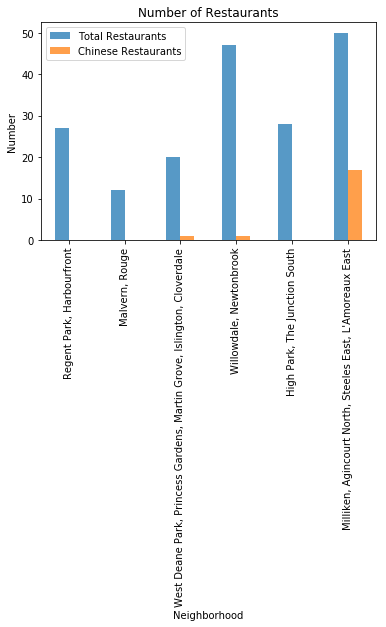

In [239]:
%matplotlib inline

ax = cluster.plot(x = 'Neighborhood', y=['Total Restaurants','Chinese Restaurants'], kind='bar',alpha=0.75, title = 'Number of Restaurants')
ax.set_ylabel('Number')

Text(0, 0.5, 'Spend power')

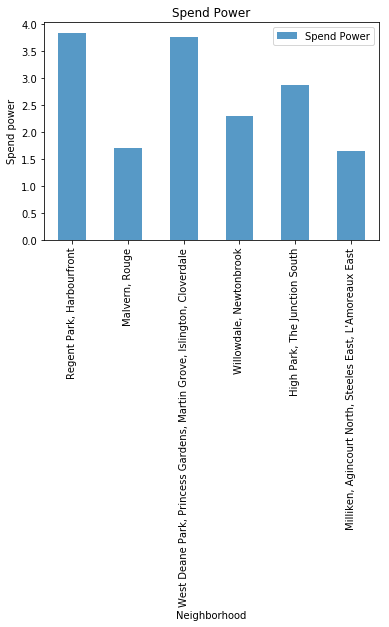

In [240]:
ax = cluster.plot(x = 'Neighborhood', y=['Spend Power'], kind='bar',alpha=0.75, title = 'Spend Power')
ax.set_ylabel('Spend power')

Text(0, 0.5, 'Population')

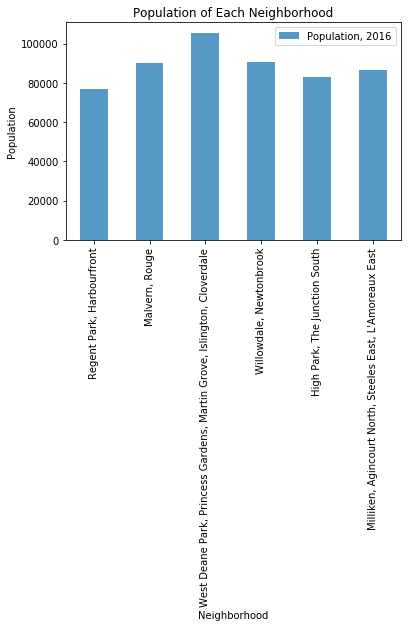

In [242]:
ax = cluster.plot(x = 'Neighborhood', y=['Population, 2016'], kind='bar',alpha=0.75, title = 'Population of Each Neighborhood')
ax.set_ylabel('Population')

Text(0, 0.5, 'Chinese Population')

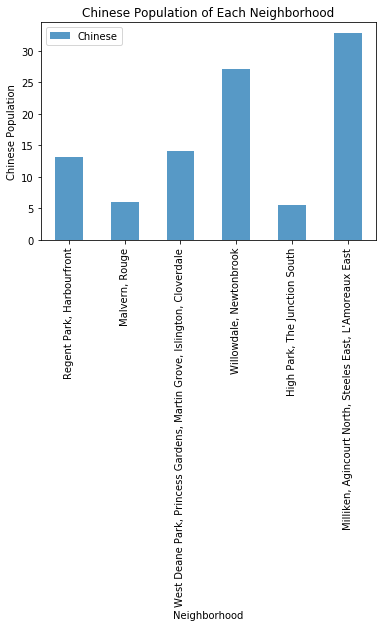

In [243]:
ax = cluster.plot(x = 'Neighborhood', y=['Chinese'], kind='bar',alpha=0.75, title = 'Chinese Population of Each Neighborhood')
ax.set_ylabel('Chinese Population')

In [244]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,cres,sp in zip(venues_merged1['Latitude'], venues_merged1['Longitude'], venues_merged1['Neighborhood'], venues_merged1['Cluster Labels'],venues_merged1['Total Restaurants'],venues_merged1['Chinese Restaurants'],venues_merged1['Spend Power']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters